In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cymr import models
from cymr import network
data_file = '/Users/morton/PycharmProjects/cmr_cfr/data/MortEtal13.csv'

In [2]:
data = pd.read_csv(data_file)
mixed = data.loc[data['list_type'] == 'mixed']
mixed

,subject,list,position,trial_type,item,item_number,session,list_type,category,response,response_time,list_category
43,1,2,1,study,SEAN PENN,229,1,mixed,cel,3.0,1.255,mixed
44,1,2,2,study,AUDREY HEPBURN,20,1,mixed,cel,3.0,1.040,mixed
45,1,2,3,study,ST PATRICKS CATHEDRAL,464,1,mixed,loc,2.0,1.164,mixed
46,1,2,4,study,LES INVALIDES,365,1,mixed,loc,2.0,0.829,mixed
47,1,2,5,study,GREAT ZIMBABWE RUINS,341,1,mixed,loc,3.0,0.872,mixed
...,...,...,...,...,...,...,...,...,...,...,...,...
71224,47,48,12,recall,CD,560,3,mixed,obj,3.0,1.592,mixed
71225,47,48,13,recall,SURGE PROTECTOR,727,3,mixed,obj,4.0,1.305,mixed
71226,47,48,14,recall,DOORKNOB,576,3,mixed,obj,4.0,1.467,mixed
71227,47,48,15,recall,LENIN MAUSOLEUM,364,3,mixed,loc,4.0,1.123,mixed


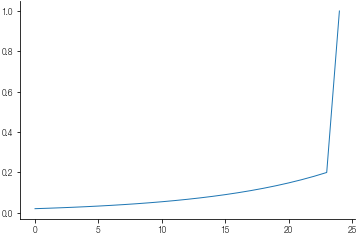

In [8]:
outputs = np.arange(25)
p_stop = network.p_stop_op(24, .02, .1)
plt.plot(outputs, p_stop)

In [28]:
np.set_printoptions(suppress=True, precision=4)
print(p_stop)

[1.0000e-01 2.7183e-01 7.3891e-01 2.0086e+00 5.4598e+00 1.4841e+01
 4.0343e+01 1.0966e+02 2.9810e+02 8.1031e+02 2.2026e+03 5.9874e+03
 1.6275e+04 4.4241e+04 1.2026e+05 3.2690e+05 8.8861e+05 2.4155e+06
 6.5660e+06 1.7848e+07 4.8517e+07 1.3188e+08 3.5849e+08 9.7448e+08
 1.0000e+00]


In [31]:
import importlib
from cymr import fit
importlib.reload(fit)
importlib.reload(models)
param_file = '/Users/morton/Dropbox/work/cfr/test4/cfr_cmr_fit.csv'
param = pd.read_csv(param_file)
group_param = param.mean().to_dict()
del group_param['subject']
del group_param['logl']
model = models.CMR()
study_data = mixed.loc[(mixed['trial_type'] == 'study')]
recalls = model.generate(study_data, group_param)

In [36]:
recalls

,subject,list,position,trial_type,item,item_number,session,list_type,category,response,response_time,list_category
0,1,2,1,study,SEAN PENN,229.0,1.0,mixed,cel,3.0,1.255,mixed
1,1,2,2,study,AUDREY HEPBURN,20.0,1.0,mixed,cel,3.0,1.040,mixed
2,1,2,3,study,ST PATRICKS CATHEDRAL,464.0,1.0,mixed,loc,2.0,1.164,mixed
3,1,2,4,study,LES INVALIDES,365.0,1.0,mixed,loc,2.0,0.829,mixed
4,1,2,5,study,GREAT ZIMBABWE RUINS,341.0,1.0,mixed,loc,3.0,0.872,mixed
...,...,...,...,...,...,...,...,...,...,...,...,...
31531,47,45,2,recall,STEVE MARTIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31532,47,45,3,recall,CHICAGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31533,47,48,1,recall,SURGE PROTECTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31534,47,48,2,recall,BARCELONA CATHEDRAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
from psifr import fr
importlib.reload(fr)
sim = fr.merge_free_recall(
    recalls, study_keys=['item_number', 'session', 'list_type', 
                         'category', 'response', 'response_time', 
                         'list_category'])

In [40]:
sim.loc[(sim['subject'] == 1) & (sim['list'] == 2)]

,subject,list,item,input,output,study,recall,repeat,intrusion,item_number,session,list_type,category,response,response_time,list_category
0,1,2,SEAN PENN,1,NaN,True,False,0,False,229.0,1.0,mixed,cel,3.0,1.255,mixed
1,1,2,AUDREY HEPBURN,2,NaN,True,False,0,False,20.0,1.0,mixed,cel,3.0,1.040,mixed
2,1,2,ST PATRICKS CATHEDRAL,3,NaN,True,False,0,False,464.0,1.0,mixed,loc,2.0,1.164,mixed
3,1,2,LES INVALIDES,4,NaN,True,False,0,False,365.0,1.0,mixed,loc,2.0,0.829,mixed
4,1,2,GREAT ZIMBABWE RUINS,5,NaN,True,False,0,False,341.0,1.0,mixed,loc,3.0,0.872,mixed
5,1,2,BRYCE CANYON,6,NaN,True,False,0,False,282.0,1.0,mixed,loc,2.0,1.241,mixed
6,1,2,TROPHY,7,NaN,True,False,0,False,746.0,1.0,mixed,obj,3.0,0.862,mixed
7,1,2,BRUSH,8,NaN,True,False,0,False,549.0,1.0,mixed,obj,3.0,0.779,mixed
8,1,2,SUPREME COURT,9,NaN,True,False,0,False,470.0,1.0,mixed,loc,2.0,1.245,mixed
9,1,2,SAN FRANCISCO,10,1.0,True,True,0,False,445.0,1.0,mixed,loc,4.0,0.854,mixed


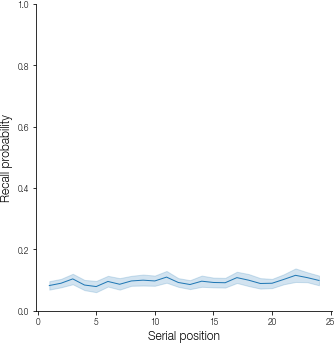

In [42]:
spc = fr.spc(sim)
fr.plot_spc(spc);

In [26]:
importlib.reload(fr)
study_data = mixed.loc[(mixed['trial_type'] == 'study') & 
                       (mixed['subject'] == 1)]
from psifr import fr
study = fr.split_lists(study_data, 'raw', ['position'])
study

{'position': [array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24]),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24]),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24]),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24]),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24]),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24]),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24]),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24]),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,